In [35]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame

ox.config(log_console=True,
          use_cache=True)



/tmp/ipykernel_27262/2315397730.py:5: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(log_console=True,


In [28]:
points_pastizal  = [[42.310665, -6.207228], [42.30961,	-6.201653], [42.310527,	-6.20393]]
points_arbustivo = [[42.31036,	-6.204549], [42.310902,	-6.206416]]
points_matorral  = [[42.310832,	-6.203042],	[42.311749,	-6.205465]]
water_points     = [[42.309282,	-6.204025],	[42.312561,	-6.204347]]
water_points_1   = [42.309282,	-6.204025]
Tabuyo_del_Monte = [42.3137131, -6.2031109]
Luyego           = [42.3430707, -6.2353512]

In [34]:
G = ox.graph_from_place('Luyego', network_type='all_private')

originId, dist_Id = ox.distance.nearest_nodes(G, Tabuyo_del_Monte[1], Tabuyo_del_Monte[0], return_dist=True)
distId1 , dist_1= ox.distance.nearest_nodes(G, Luyego[1], Luyego[0], return_dist=True)
distId2 , dist_2= ox.distance.nearest_nodes(G, water_points_1[1], water_points_1[0], return_dist=True)
print(originId,distId1,distId2)

route = nx.shortest_path(G, originId, distId2, weight='length')

route_map = ox.plot_route_folium(G, route)


route_map

899234936 7636026248 899227771


/tmp/ipykernel_27262/1503391393.py:10: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, route)


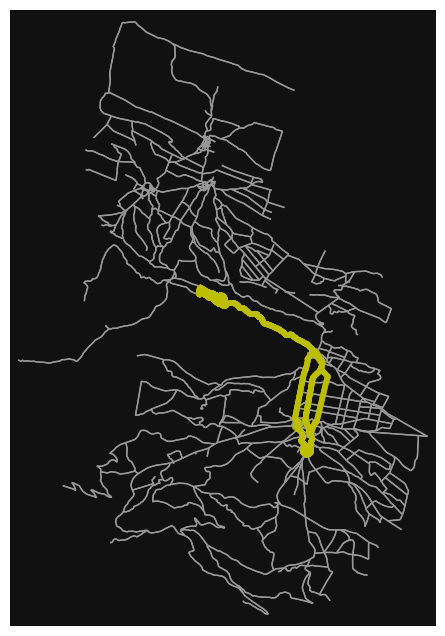

In [38]:
routes = ox.k_shortest_paths(G, distId1, distId2, k=30, weight="length")
fig, ax = ox.plot_graph_routes(G, list(routes), route_colors="y", route_linewidth=4, node_size=0)